* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab 5: Model complexity and model selection </h1>

<pre align="left"> September 28th 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Know when the model underfits and overfits and act accordingly
- Perform hyperparameter tuning using cross validation
- Use scikit-learn pipelines to streamline machine learning steps

## 1 - Reading and visualizing data 


First we load a dataset of images of famous persons and visualize some examples.

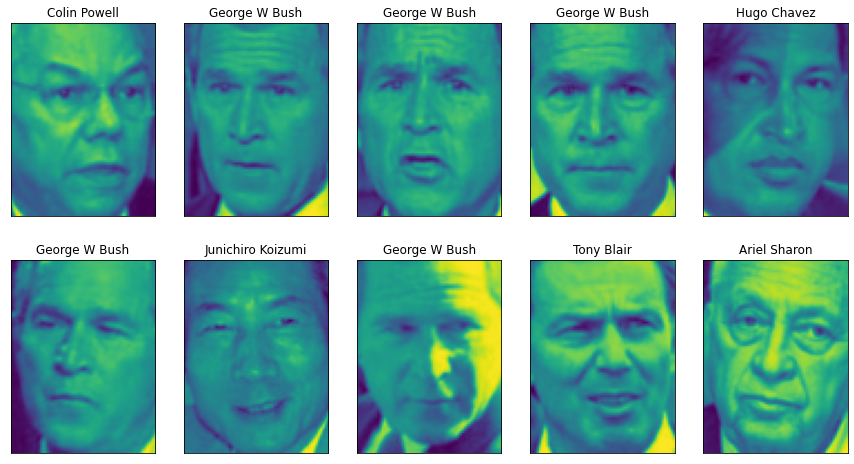

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt

people = fetch_lfw_people(min_faces_per_person=60, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    


In [12]:
print(people)

{'data': array([[0.5281046 , 0.52156866, 0.50980395, ..., 0.01045752, 0.00653595,
        0.00130719],
       [0.30849674, 0.2509804 , 0.20261438, ..., 0.95032686, 0.945098  ,
        0.93071896],
       [0.28366014, 0.37385622, 0.37777779, ..., 0.71503276, 0.93333334,
        0.94640523],
       ...,
       [0.11633987, 0.11372549, 0.11503268, ..., 0.58431375, 0.5777778 ,
        0.5424837 ],
       [0.19477125, 0.19607843, 0.2248366 , ..., 0.65228766, 0.6562092 ,
        0.5411765 ],
       [0.12810458, 0.10980392, 0.09411765, ..., 0.14901961, 0.20392157,
        0.3385621 ]], dtype=float32), 'images': array([[[0.5281046 , 0.52156866, 0.50980395, ..., 0.2627451 ,
         0.26143792, 0.25620916],
        [0.5503268 , 0.5607843 , 0.53464055, ..., 0.2653595 ,
         0.2627451 , 0.26143792],
        [0.57647055, 0.5633987 , 0.52026147, ..., 0.26143792,
         0.25882354, 0.26143792],
        ...,
        [0.4117647 , 0.724183  , 0.80522877, ..., 0.00653595,
         0.00653595, 0.00

Some information about the dataset can be obtained by getting the documentation of the fetch function:

In [2]:
help(fetch_lfw_people)

Help on function fetch_lfw_people in module sklearn.datasets._lfw:

fetch_lfw_people(*, data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)
    Load the Labeled Faces in the Wild (LFW) people dataset (classification).
    
    Download it if necessary.
    
    =================   =======================
    Classes                                5749
    Samples total                         13233
    Dimensionality                         5828
    Features            real, between 0 and 255
    =================   =======================
    
    Read more in the :ref:`User Guide <labeled_faces_in_the_wild_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    funneled : boo

We print data shapes info:

In [7]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (1348, 87, 65)
Number of classes: 8


We have 62 different persons in the dataset with a total of 3023 images of shape (87x65).

### Question 0
Count how many each person appears in the dataset. 

Hint: Look up the function `np.bincount`

In [13]:
print(people.target)

[1 3 3 ... 7 3 5]


In [11]:
np.bincount(people.target)

array([ 77, 236, 121, 530, 109,  71,  60, 144])

We reshape the images the dataset to be of the form (n_samples x n_features)

In [8]:
#

X = people.images.reshape(len(people.images), -1)
y = people.target
X.min(), X.max(), X[0]

(0.0,
 1.0,
 array([0.5281046 , 0.52156866, 0.50980395, ..., 0.01045752, 0.00653595,
        0.00130719], dtype=float32))

The image values are between 0 and 255. We rescale them to 0-1.

In [9]:
X = X / 255

### Question 1
Split the dataset into train and test (80% train). Look up the documentation of `train_test_split` to make sure the frequency of each label is respected in the splits. If you wrote a naive classifier that predicts the target of the person by picking a number randomly (uniformly). What would be its prediction score ? 

This would be our score baseline i.e the performance of chance.

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

NameError: name 'X' is not defined

### Question 2

We start with making predictions with a K-nearest-neighbors (kNN) model. KNN predicts the target (the identity of the person) based on the majority vote of the target of the K closest images to it. Here we define "close" by computing a simple squared euclidean distance between the images.

Fit a k-NN with k [1, 2, 3, 4, 5] and compute its prediction score for train and test. How do you explain this result ? Does it overfit or underfit ?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


k_values=[1,2,3,4,5]

neigh=KNeighborsClassifier(n_neighbors=k_values)
neigh.fit(X,y)

neigh.predict([[1.1]])

### Question
Display its train and test accuracy as a function of the number of train samples. Keep the number of test samples unchaned.

### Question 3
Compute knn scores but this time do a PCA before to reduce the dimensionality of the data to 100 components

### Question 4 
Repeat this operation but set the PCA argument `whiten` to True. What do you notice ? How do you explain it ?

### Question 5
Look up the attributes of the PCA object and visualize the first 10 components (as images).

### Question 6
We can automatize the choice of K by performing cross-validation:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
params = {'n_neighbors': [2, 5, 10]}
clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

y_pred = clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

You can look up the best performing model:

In [ ]:
clf.best_estimator_

We would like to optimize over the choice of PCA n_components as well. To do this we 
 can streamline the PCA + classifier operation by creating a pipeline object. And pass it to the GridSearchCV object with key-coded parameters named like this:

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('pca', PCA()),
                  ('classifier', KNeighborsClassifier()
)])

params = {'pca__n_components': [100, 1000], 'classifier__n_neighbors': [2]}



What are the best choices of n_components and k ?

### Question 7
We move on to a different kind of model. We start with a simple linear classifier (LDA). 
Compute its performance (accuracy) with and without PCA. What do you notice ? Use a pipeline.

Interpret the results. What can you say about model complexity of LDA ? What should we do to improve the performance ?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



### Question 8
Repeat the operation with a random forest classifier. What do you notice ?

In [ ]:
from sklearn.ensemble import RandomForestClassifier



### Question 9
Look up its hyperparameters (`min_samples_leaf`, `n_estimators`, `max_depth` etc). Tune the values of these these hyperparameters using GridSearchCV. Can you beat the LDA method ?

### Question 10
GradientBoosting methoda are optimized versions of RandomForests where trees are added to the forest sequentially by picking "optimal" trees to add. Optimize their hyperparameters and compare with random forests.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier


### Question 11
